In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.patches as mpatches
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split, TimeSeriesSplit
from sklearn.neighbors import KNeighborsRegressor as KNN
from sklearn.metrics import mean_squared_error,mean_absolute_percentage_error, r2_score
import numpy as np
from sklearn.metrics import accuracy_score

In [2]:
url = '../data_preparation/data_preparation.csv'
df = pd.read_csv(url, sep = ',')

In [3]:
df

,Date,GOLD_open,GOLD_high,GOLD_low,GOLD_close,copper,crude_oil,DXY,EURUSD,MSCI,NASDAQ,NLR,platinum,RUT,silver,SP500,VIX
0,2023-11-03,1993.5,2011.9,1989.3,1999.2,3.6815,80.51,105.02,1.0732,497.76,13478.28,71.36,944.3,1760.71,23.285,4358.34,14.91
1,2023-11-02,1992.0,1999.2,1986.3,1993.5,3.6725,82.46,106.12,1.0622,487.02,13294.19,72.14,930.6,1714.21,22.846,4317.78,15.66
2,2023-11-01,1993.3,2005.9,1978.2,1987.5,3.6490,80.44,106.88,1.0570,471.85,13061.47,70.98,930.4,1669.70,22.790,4237.86,16.87
3,2023-10-31,2005.6,2017.7,1987.4,1994.3,3.6490,81.02,106.66,1.0578,471.55,12851.24,69.93,944.9,1662.28,22.952,4193.80,18.14
4,2023-10-30,2013.5,2016.8,1999.7,2005.6,3.6585,82.31,106.12,1.0617,481.99,12789.48,68.35,939.9,1647.29,23.396,4166.82,19.75
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3418,2010-04-08,1150.2,1154.7,1144.4,1152.9,3.5865,85.39,81.53,1.3361,36.19,2436.81,69.42,1717.1,699.64,18.127,1186.44,16.48
3419,2010-04-07,1135.2,1154.2,1133.3,1153.0,3.5975,85.88,81.44,1.3345,37.31,2431.16,69.75,1723.2,699.46,18.199,1182.45,16.62
3420,2010-04-06,1131.9,1139.6,1123.5,1136.0,3.6170,86.84,81.39,1.3400,37.37,2436.81,70.59,1704.5,701.48,17.931,1189.44,16.23
3421,2010-04-05,1122.0,1134.3,1120.8,1133.8,3.6315,86.62,81.09,1.3487,36.98,2429.53,70.44,1709.8,697.65,18.118,1187.44,17.02


In [4]:
df['Date'] = pd.to_datetime(df['Date'])

In [5]:
df = df.sort_values('Date').reset_index().drop(columns = 'index')

In [6]:
df.head()

,Date,GOLD_open,GOLD_high,GOLD_low,GOLD_close,copper,crude_oil,DXY,EURUSD,MSCI,NASDAQ,NLR,platinum,RUT,silver,SP500,VIX
0,2010-04-01,1114.6,1129.1,1112.3,1126.1,3.5840,84.87,80.78,1.3590,36.47,2402.58,69.45,1675.6,683.98,17.890,1178.10,17.47
1,2010-04-05,1122.0,1134.3,1120.8,1133.8,3.6315,86.62,81.09,1.3487,36.98,2429.53,70.44,1709.8,697.65,18.118,1187.44,17.02
2,2010-04-06,1131.9,1139.6,1123.5,1136.0,3.6170,86.84,81.39,1.3400,37.37,2436.81,70.59,1704.5,701.48,17.931,1189.44,16.23
3,2010-04-07,1135.2,1154.2,1133.3,1153.0,3.5975,85.88,81.44,1.3345,37.31,2431.16,69.75,1723.2,699.46,18.199,1182.45,16.62
4,2010-04-08,1150.2,1154.7,1144.4,1152.9,3.5865,85.39,81.53,1.3361,36.19,2436.81,69.42,1717.1,699.64,18.127,1186.44,16.48


In [7]:
df.columns

Index(['Date', 'GOLD_open', 'GOLD_high', 'GOLD_low', 'GOLD_close', 'copper',
       'crude_oil', 'DXY', 'EURUSD', 'MSCI', 'NASDAQ', 'NLR', 'platinum',
       'RUT', 'silver', 'SP500', 'VIX'],
      dtype='object')

Gold Prices:

- GOLD_open: Opening price of gold.
- GOLD_high: Highest price of gold.
- GOLD_low: Lowest price of gold.
- GOLD_close: Closing price of gold.

Stocks and Market Indices:
- MSCI: Performance of emerging market stocks.
- NASDAQ: Performance of tech and internet-related stocks.
- NLR: Represents the nuclear energy sector.
- RUT: Performance of 2000 smaller-cap stocks in the US.
- SP500: Performance tracking 500 large-cap US-listed companies.

Commodities:

- copper: Price of Copper.
- crude_oil: Price of Crude Oil.
- silver: Price of Silver.

Foreign Exchange:

- DXY: Dollar Index, value of the US dollar against a basket of major currencies.
- EURUSD: Exchange rate between the Euro and the US Dollar.

Volatility Index:

- VIX: Stock market’s expectation of volatility based on S&P 500 index options.

### **1. Trend**

In [9]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler


def corr(feature):
    scaler = MinMaxScaler()
    df_normalized = pd.DataFrame(scaler.fit_transform(df[['GOLD_close', feature]]), columns=['GOLD_close', feature])
    df_normalized['Date'] = df['Date']

    plt.figure(figsize=(30, 6))
    plt.plot(df_normalized['Date'], df_normalized['GOLD_close'], linestyle='-', color='#003049', linewidth=2.5, label='Gold Price')
    plt.plot(df_normalized['Date'], df_normalized[feature], linestyle='-', color='#780000', linewidth=2.5, label=feature)
    plt.title('Gold vs ' + feature, fontsize=30, weight='bold')
    plt.xlabel('Date', fontsize=20)
    plt.ylabel('Value', fontsize=20)
    plt.legend(fontsize=15)
    plt.grid(True)
    plt.show()


The gold price has increased by about 200% over the past 10 years (1110 USD/ounce to 2000 USD/ounce), but it has also experienced several large swings in both directions

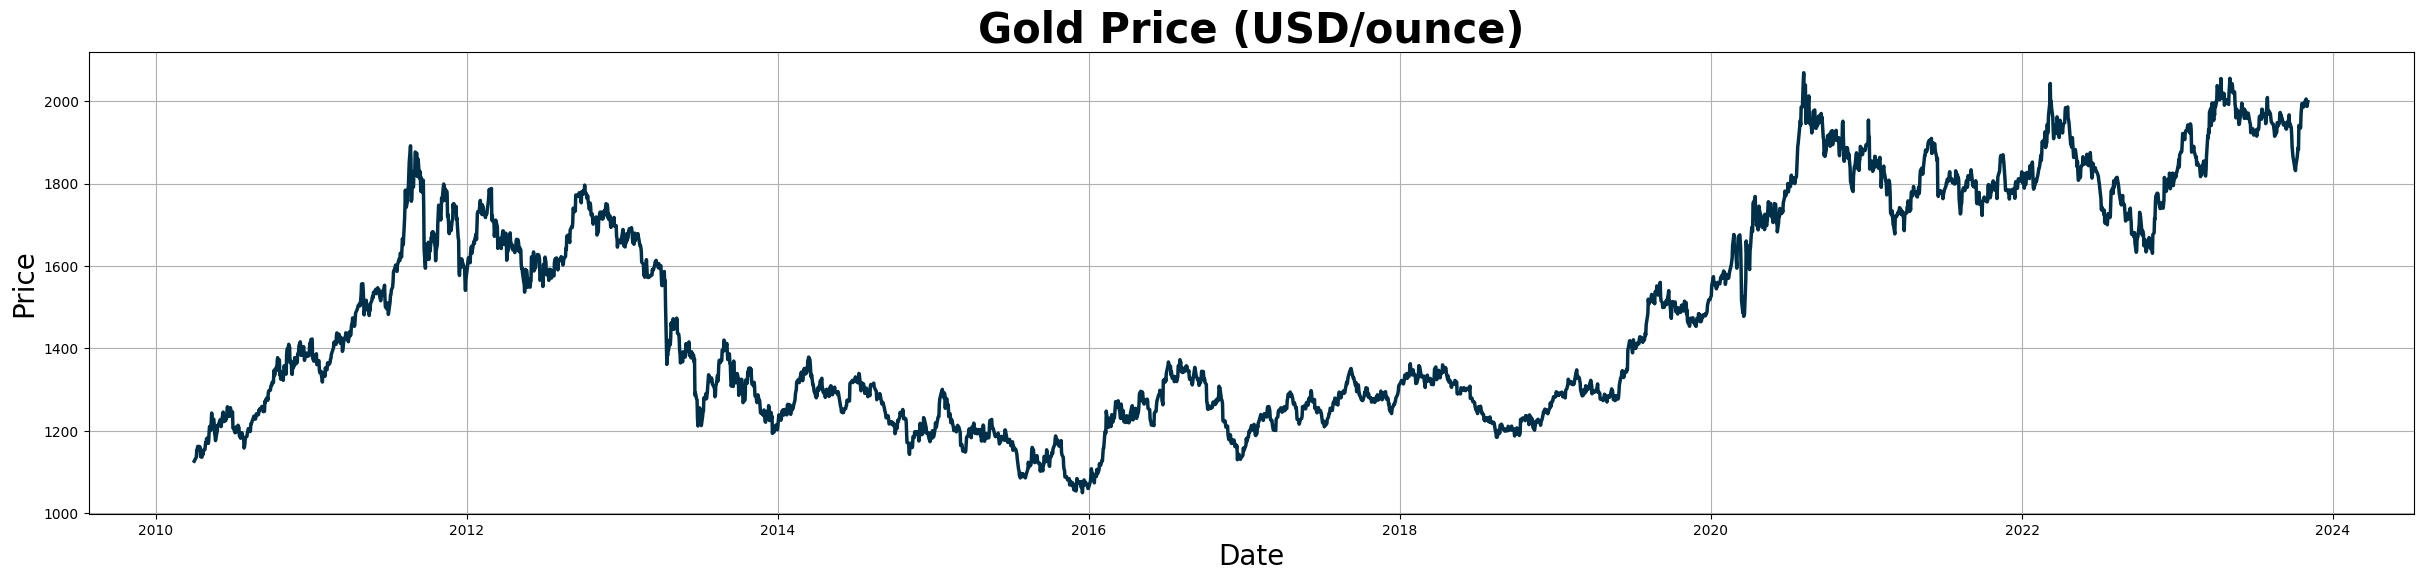

In [10]:
import pandas as pd
import matplotlib.pyplot as plt

# Vẽ biểu đồ
plt.figure(figsize=(30, 6))
plt.plot(df['Date'], df['GOLD_close'], linestyle='-',
         color = '#003049', linewidth = 2.5)
plt.title('Gold Price (USD/ounce)', fontsize=30, weight='bold')
plt.xlabel('Date', fontsize=20)
plt.ylabel('Price', fontsize=20)

plt.grid(True)
plt.show()


Gold tends to rise when inflation is high, as it preserves purchasing power and acts as an inflation hedge.


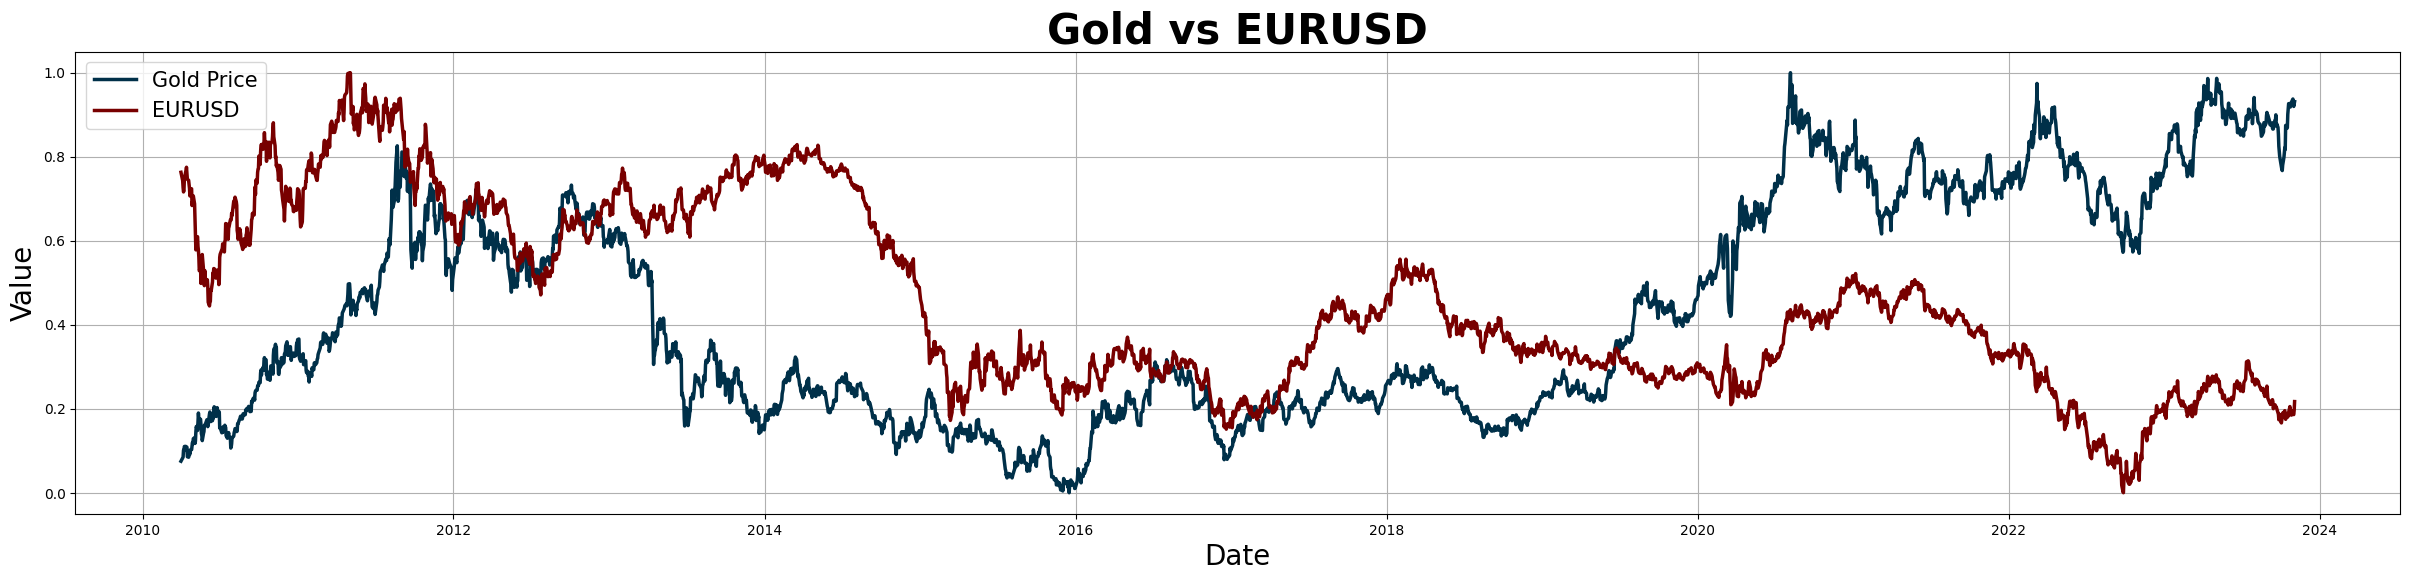

In [11]:
corr(feature = 'EURUSD')

Gold tends to rise when the US dollar is weak, as it becomes cheaper for foreign buyers and reflects the loss of confidence in the reserve currency.

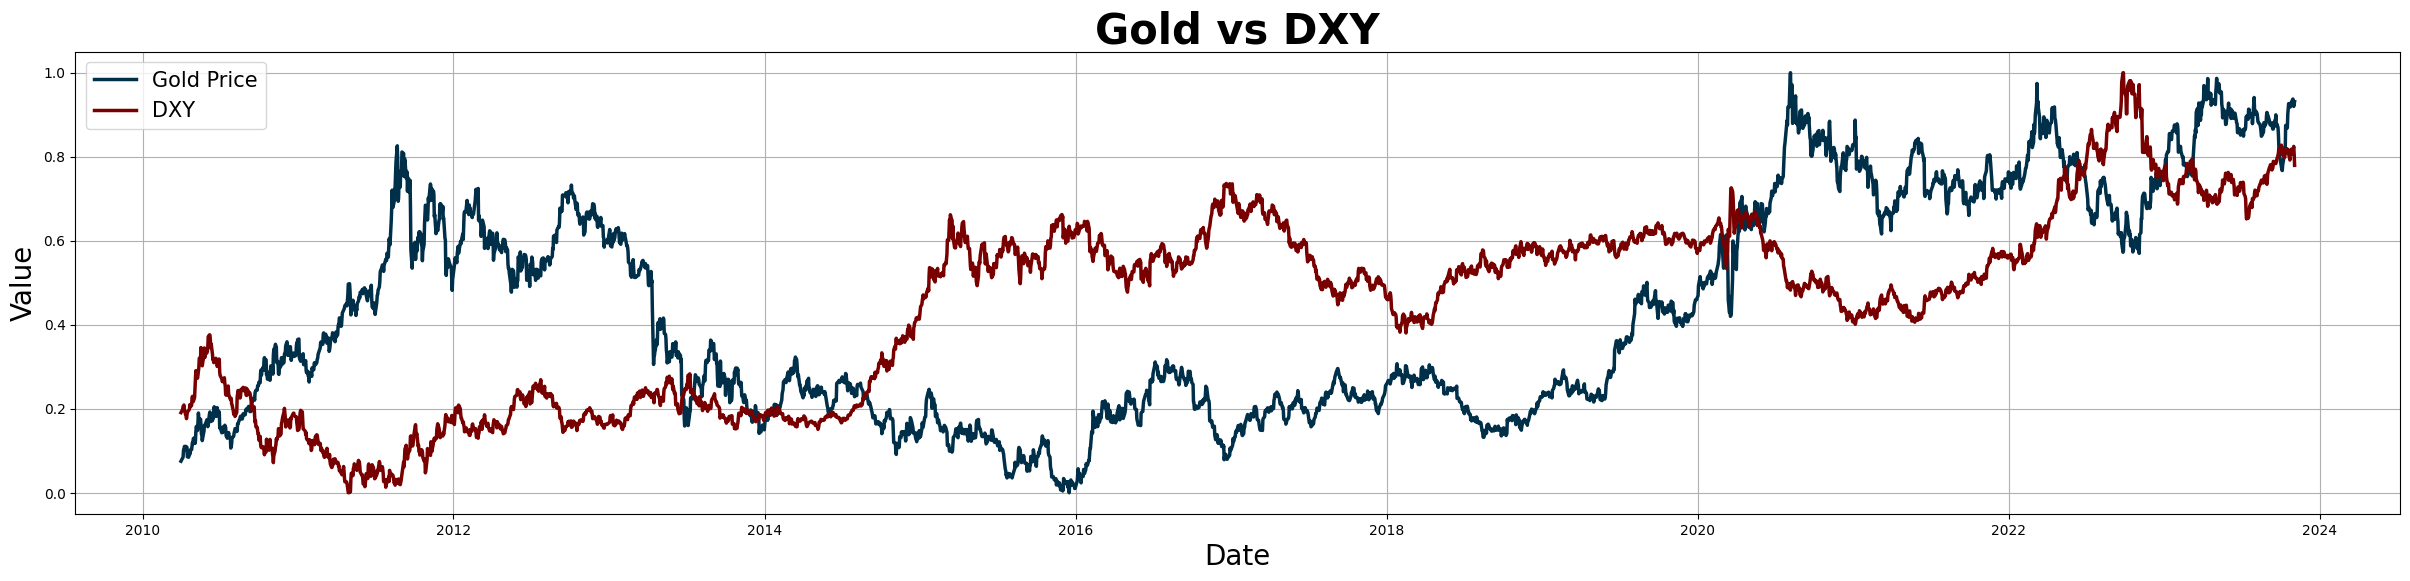

In [12]:
corr(feature = 'DXY')

Gold and other metals like copper, platinum, and silver exhibit a trend that shows significant similarities.

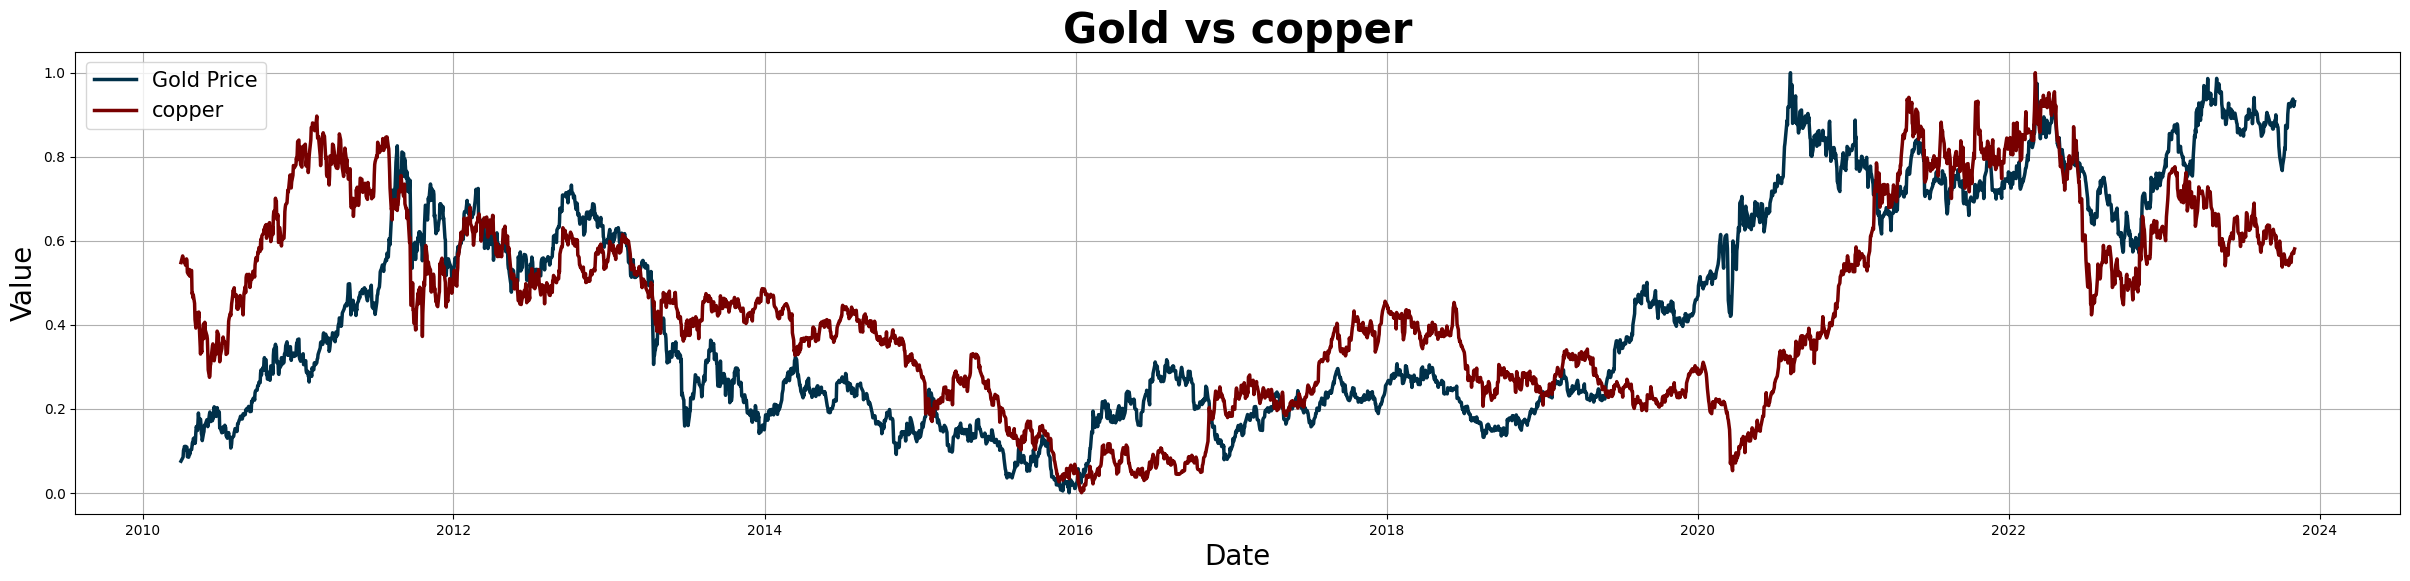

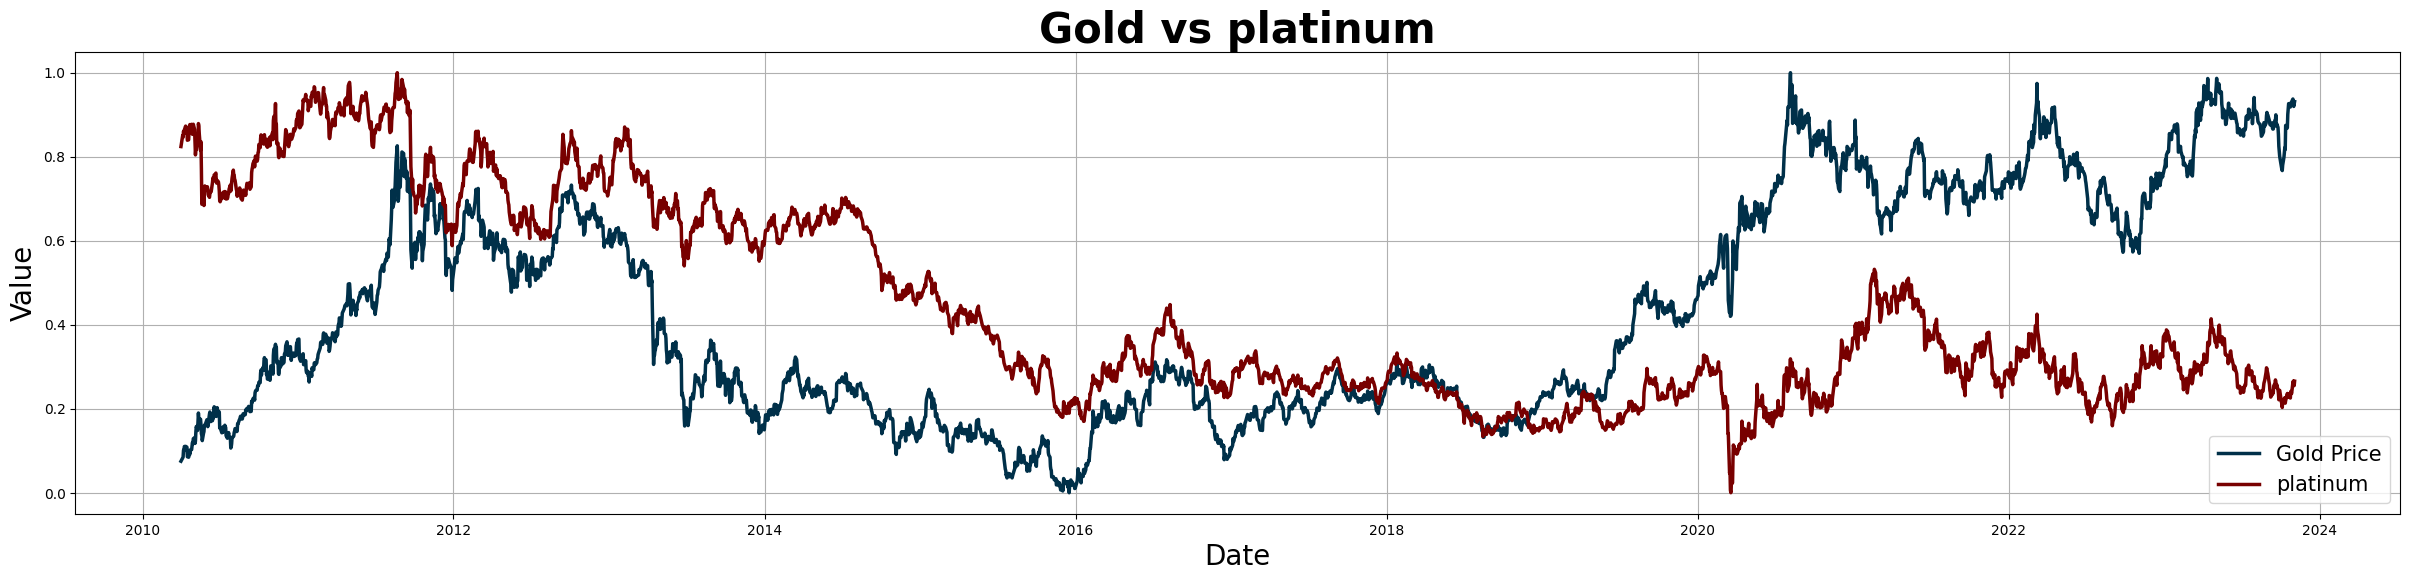

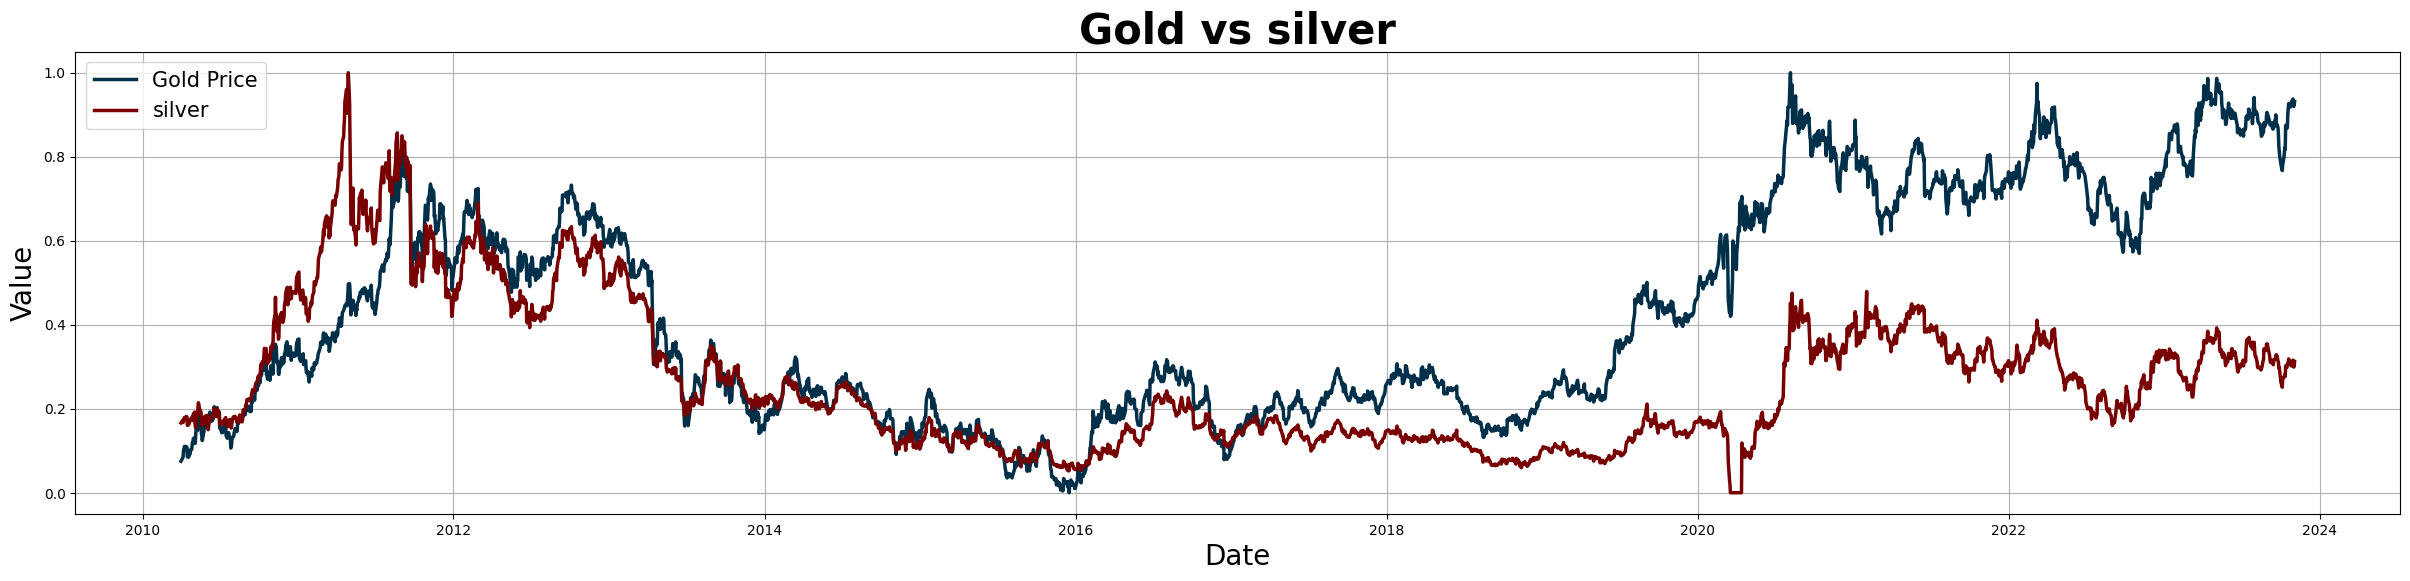

In [13]:
for feature in ['copper', 'platinum', 'silver']:
    if feature == 'Date':
        continue
    corr(feature)

### **2. Outliers**

Outliers exist at 3 columns: ‘NLR’, ‘silver’ and ‘VIX’

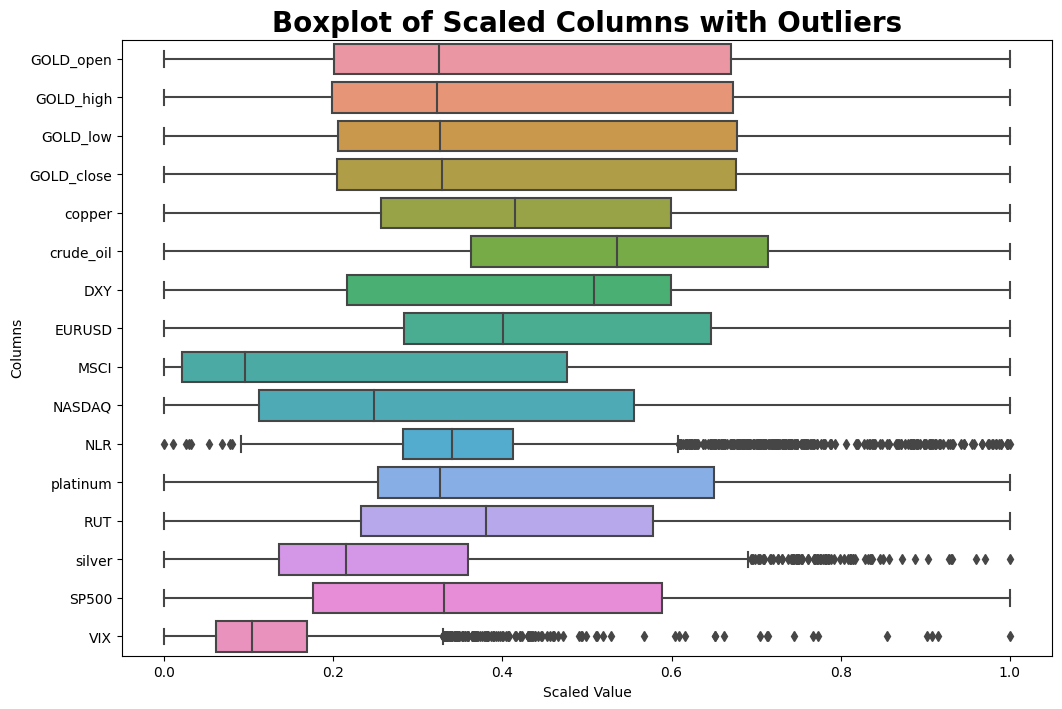

In [14]:
from sklearn.preprocessing import MinMaxScaler
import seaborn as sns
import matplotlib.pyplot as plt

# Lựa chọn các cột dữ liệu để vẽ đồ thị và chuẩn hóa
columns_to_plot = ['GOLD_open', 'GOLD_high', 'GOLD_low', 'GOLD_close', 'copper', 'crude_oil', 'DXY', 'EURUSD', 'MSCI', 'NASDAQ', 'NLR', 'platinum', 'RUT', 'silver', 'SP500', 'VIX']

# Chuẩn hóa dữ liệu
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(df[columns_to_plot])
scaled_df = pd.DataFrame(scaled_data, columns=columns_to_plot)

plt.figure(figsize=(12, 8))

# Vẽ boxplot cho từng cột dữ liệu đã chuẩn hóa
sns.boxplot(data=scaled_df, orient='h')

plt.title('Boxplot of Scaled Columns with Outliers', fontsize=20, weight='bold')
plt.xlabel('Scaled Value', fontsize=10)
plt.ylabel('Columns', fontsize=10)
plt.show()

In [15]:
import pandas as pd


def outliers(column_name):
    # Tính IQR
    Q1 = df[column_name].quantile(0.25)
    Q3 = df[column_name].quantile(0.75)
    IQR = Q3 - Q1

    # Tìm outliers
    outliers = df[(df[column_name] < (Q1 - 1.5 * IQR)) | (df[column_name] > (Q3 + 1.5 * IQR))][column_name]
    print(column_name, outliers.count())
    
for column in df.columns:
    outliers(column_name = column)

Date 0
GOLD_open 0
GOLD_high 0
GOLD_low 0
GOLD_close 0
copper 0
crude_oil 0
DXY 0
EURUSD 0
MSCI 0
NASDAQ 0
NLR 291
platinum 0
RUT 0
silver 83
SP500 0
VIX 132


There are outliers present in three columns: 'NLR,' 'silver,' and 'VIX.' These outliers are representative of true values stemming from natural variations within the population. Hence, we have decided not to remove these outliers.

In [16]:
import matplotlib.pyplot as plt

def visualize_outlier_over_time(feature):
    # Xác định outliers trong cột 'GOLD_close' sử dụng IQR
    Q1 = df[feature].quantile(0.25)
    Q3 = df[feature].quantile(0.75)
    IQR = Q3 - Q1
    outliers = df[(df[feature] < (Q1 - 1.5 * IQR)) | (df[feature] > (Q3 + 1.5 * IQR))]

    # Vẽ đồ thị thể hiện outliers theo thời gian
    plt.figure(figsize=(20, 6))
    plt.grid(True)

    plt.scatter(df['Date'], df[feature], label= feature, color='#003049')
  
    plt.scatter(outliers['Date'], outliers[feature], label='Outliers', color='#780000', s=100, marker='o')

    plt.title('%s with Outliers Over Time' %(feature), fontsize=20, weight='bold')
    plt.xlabel('Date', fontsize=20)
    plt.ylabel('Value', fontsize=20)
    plt.legend()
    plt.show()


##### 2.1. NLR

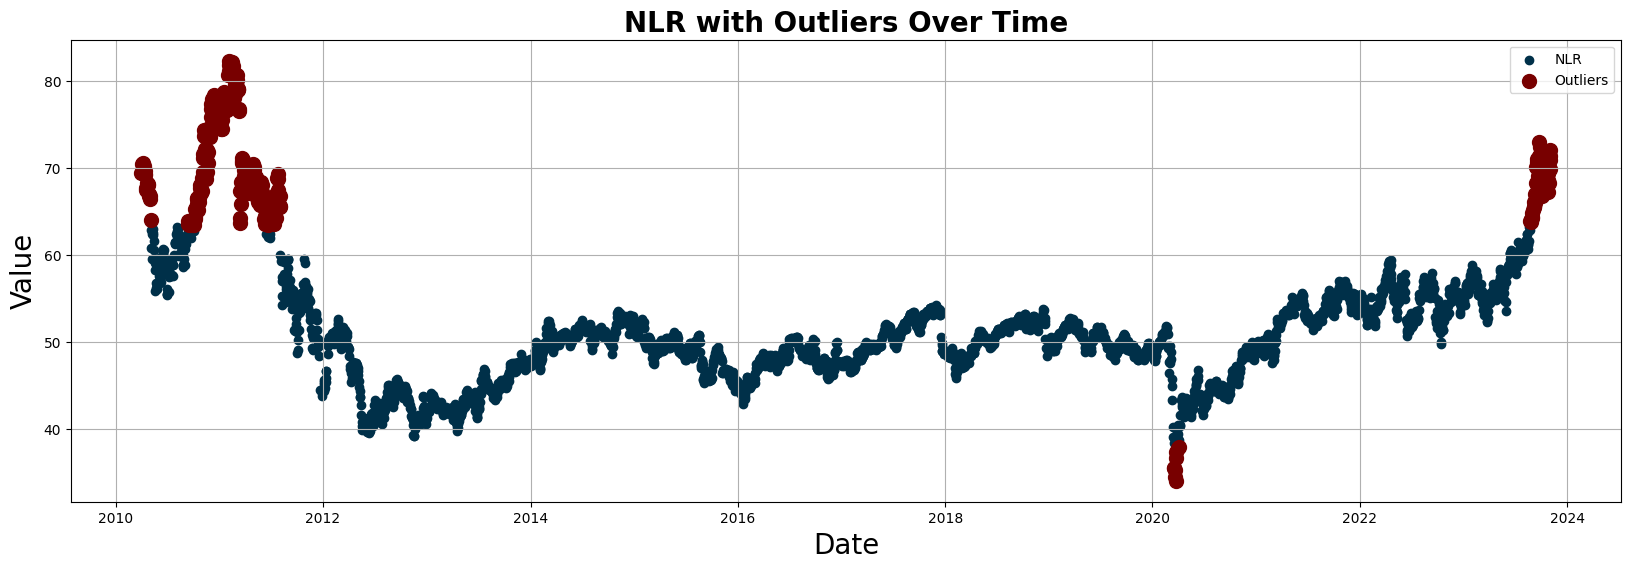

In [17]:
visualize_outlier_over_time(feature = 'NLR')

In the NLR column, outliers are observed around the years 2011, 2020, and 2024

2011, the Fukushima disaster in Japan in 2011 led to a sharp dip in nuclear output as countries took plants offline due to safety concerns

2020, because of COVID-19 Impact, the global nuclear power generation fell by about 3% in Q1 2020 compared with Q1 2019

The 2024 outlier was driven by depleting oil, gas, and coal reserves estimated to exhaust within a century. Nuclear energy emerged as a leading clean and cost-effective electricity source.

##### 2.2. Silver

Silver has a significant increasing in 2011 because of Global financial crisis aftermath (2008) and Quantitative Easing (QE) programs (announced in November 2010).

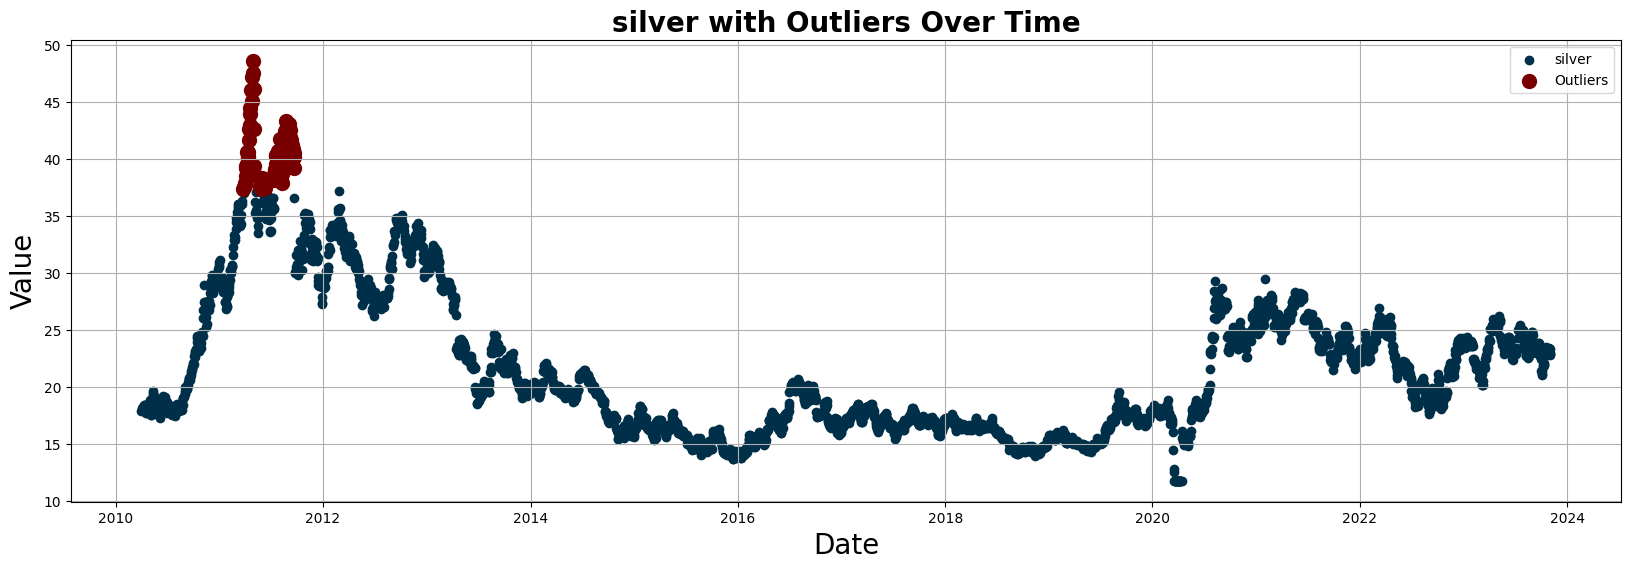

In [18]:
visualize_outlier_over_time(feature = 'silver')

##### 2.3. VIX

The VIX, or Volatility Index, measures the market’s expectation of future volatility implied by S&P 500 index options. This value has outliers in 2010, 2011, 2015, 2018, 2019, 2020, 2022.

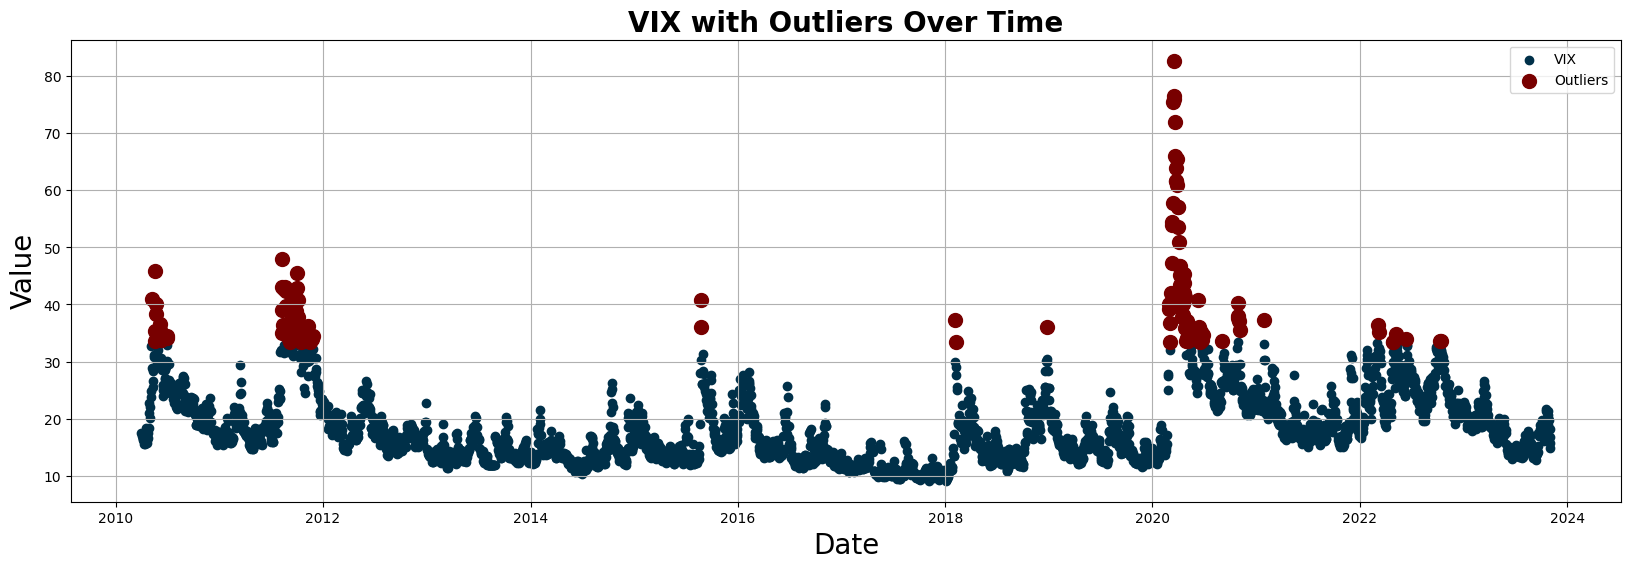

In [19]:
visualize_outlier_over_time(feature = 'VIX')

2010: Flash Crash: The May 6th flash crash caused a sudden and dramatic drop in the S&P 500, sparking a surge in anxiety and volatility expectations.

2011: European Sovereign Debt Crisis: Concerns about Greece's sovereign debt crisis and its potential impact on the global financial system led to increased market volatility and a rise in the VIX.

2015: Chinese Yuan Devaluation: China's surprise devaluation of the yuan in August 2015 raised concerns about a global economic slowdown and triggered a spike in volatility.

2018: Trade Wars: Escalating trade tensions between the US and China fueled market uncertainty and volatility, pushing the VIX higher.

2019: US-Iran Tensions: Rising tensions between the US and Iran over Iran's nuclear program heightened geopolitical anxieties and led to a jump in the VIX.

2020: COVID-19 Pandemic: The outbreak of the COVID-19 pandemic in early 2020 triggered an unprecedented sell-off in the stock market and a record high VIX reading.

2022: Russian Invasion of Ukraine: The Russian invasion of Ukraine in February 2022 caused significant market turmoil and a surge in volatility, reflected in the VIX.

### **3. The correlation between gold prices and other asset prices**

Generally speaking, gold has a low or positive correlation with most other assets

C:\Users\Administrator\AppData\Local\Temp\ipykernel_25584\3596215135.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), cmap = 'RdBu')


<AxesSubplot: >

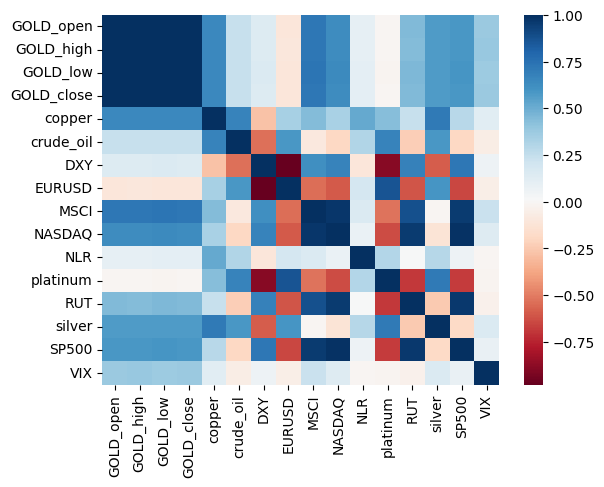

In [20]:
import seaborn as sns

sns.heatmap(df.corr(), cmap = 'RdBu')


• Gold has a positive correlation with silver, copper and other precious metals, as they share similar drivers and characteristics.

• Gold has a positive correlation with the VIX, a measure of market volatility, as they both reflect investor sentiment and risk aversion.


### **4. Seasonality in the gold price data**

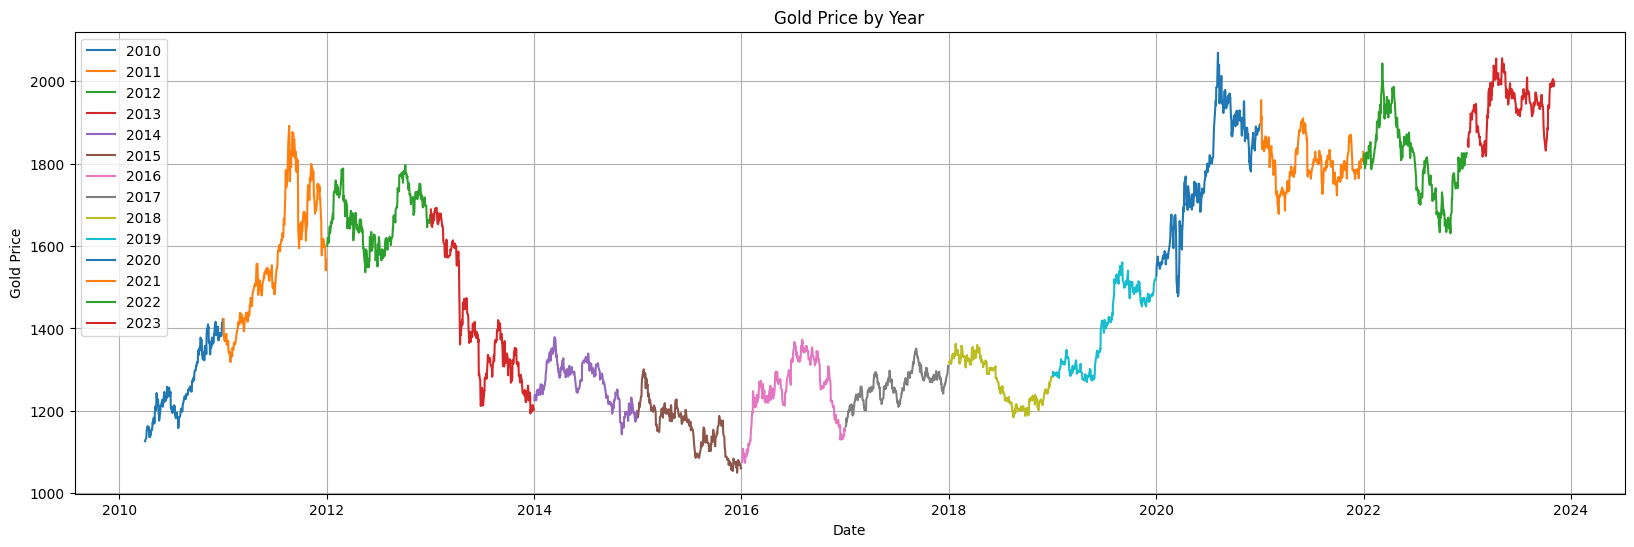

In [33]:
import pandas as pd
import matplotlib.pyplot as plt

gold_data = df.copy()
# Giả sử 'Date' là cột thời gian và 'Price' là giá vàng
# Đổi cột 'Date' thành kiểu dữ liệu datetime
gold_data['Date'] = pd.to_datetime(gold_data['Date'])

# Đặt cột 'Date' làm index của DataFrame (nếu nó không phải index ban đầu)
gold_data.set_index('Date', inplace=True)

# Lọc dữ liệu theo từng năm và vẽ biểu đồ cho từng năm
years = gold_data.index.year.unique()

plt.figure(figsize=(20, 6))

for year in years:
    # Lọc dữ liệu theo từng năm
    data_year = gold_data[gold_data.index.year == year]
    
    # Vẽ biểu đồ cho từng năm
    plt.plot(data_year.index, data_year['GOLD_close'], label=str(year))

plt.title('Gold Price by Year')
plt.xlabel('Date')
plt.ylabel('Gold Price')
plt.legend()
plt.grid(True)
plt.show()


There is no seasonality trend in Gold price.

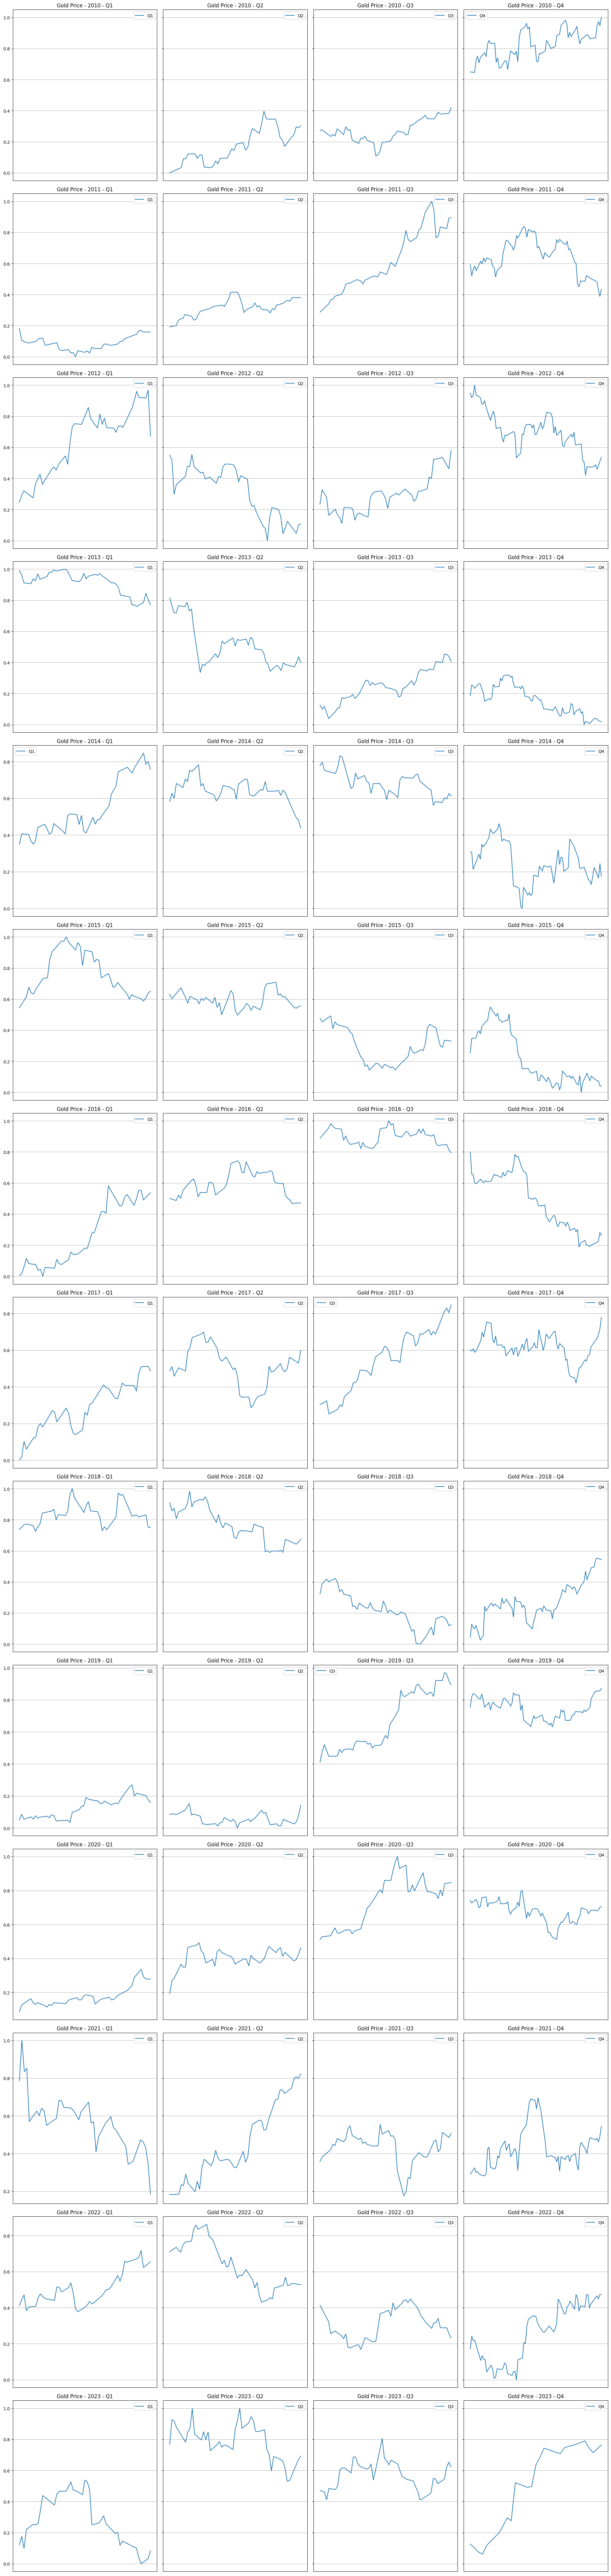

In [49]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler

# Đọc dữ liệu giá vàng từ file CSV hoặc từ nguồn dữ liệu
# gold_data = pd.read_csv('ten_file.csv')

# Chuyển cột 'Date' thành kiểu dữ liệu datetime
gold_data['Date'] = pd.to_datetime(gold_data['Date'])

# Tạo đồ thị riêng cho từng quý của từng năm (normalized)
years = gold_data['Date'].dt.year.unique()

fig, axes = plt.subplots(nrows=len(years), ncols=4, figsize=(20, 6 * len(years)), sharey='row')

for i, year in enumerate(years):
    # Lọc dữ liệu giá vàng cho từng năm
    data_year = gold_data[gold_data['Date'].dt.year == year]
    
    # Normalize dữ liệu giá vàng của từng năm
    scaler = MinMaxScaler()
    scaled_price = scaler.fit_transform(data_year['GOLD_close'].values.reshape(-1, 1))
    
    # Tạo đồ thị cho mỗi quý
    for j in range(4):  # 4 quý trong một năm
        start_date = pd.Timestamp(year, j * 3 + 1, 1)
        end_date = pd.Timestamp(year, (j + 1) * 3, 1) if j < 3 else pd.Timestamp(year + 1, 1, 1)
        
        quarter_data = data_year[(data_year['Date'] >= start_date) & (data_year['Date'] < end_date)]
        quarter_scaled_price = scaled_price[(data_year['Date'] >= start_date) & (data_year['Date'] < end_date)]
        
        ax = axes[i, j]
        ax.plot(quarter_data['Date'], quarter_scaled_price, label=f'Q{j+1}')
        ax.set_title(f'Gold Price - {year} - Q{j+1}')
        # ax.set_xlabel('Date')
        ax.set_ylabel('')
        ax.legend()
        ax.grid(True)
        ax.set_xticks([])
        
plt.tight_layout()
plt.show()
